In [1]:
from sklearn.datasets import *
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
boston = load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [3]:
#converting the data into a dataframe

bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['Prices'] = boston.target


In [4]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Prices
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
# calling a lasso regression object
reg = linear_model.Lasso(alpha=0.1)
regL = linear_model.LinearRegression()

In [6]:
#fitting a lasso regression model
reg.fit(bos[boston.feature_names], bos['Prices'])
regL.fit(bos[boston.feature_names], bos['Prices'])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
col = bos.columns.drop('Prices')

In [8]:
col

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [9]:
len(reg.coef_)

13

In [10]:
print(reg.coef_)
print(reg.intercept_)

[-0.09789363  0.04921111 -0.03661906  0.95519003 -0.          3.70320175
 -0.01003698 -1.16053834  0.27470721 -0.01457017 -0.77065434  0.01024917
 -0.56876914]
25.577073179662136


In [11]:
coef = pd.Series(reg.coef_,index = col)
coef.head()

CRIM    -0.097894
ZN       0.049211
INDUS   -0.036619
CHAS     0.955190
NOX     -0.000000
dtype: float64

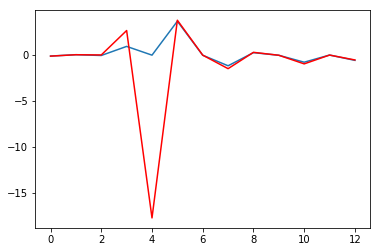

In [13]:
## Comparing the simple linear regression with the LASSO regression(regularized)
plt.plot(reg.coef_)
plt.plot(regL.coef_,color='r')

plt.show()

In [15]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

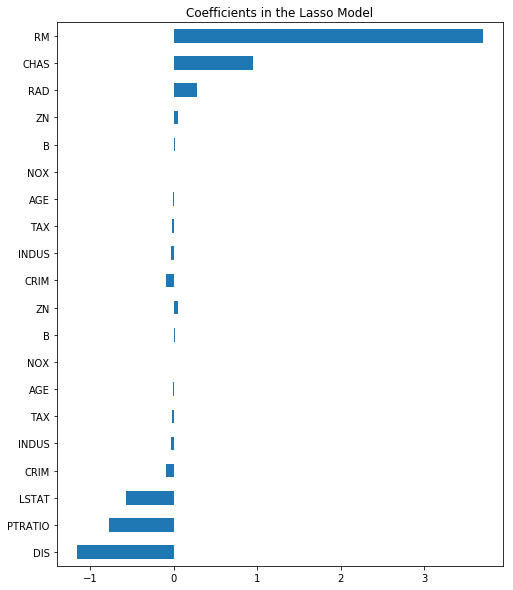

In [16]:
### LASSO for variable selection

imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [17]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 12 variables and eliminated the other 1 variables
